<center>

# Glass Classification

Assignment submitted by :   ***[Ritvik Prasad M](https://github.com/greyhatguy007/)***

Registration Number             :   **210801159**

</center>

### Context and Content

---

<u>**Context**</u>

This is a Glass Identification Data Set from UCI. It contains 9 attributes.

The response is glass type(discrete 7 values)

[Kaggle Link](https://www.kaggle.com/datasets/uciml/glass?datasetId=738)

[UCI dataset Link](https://archive.ics.uci.edu/ml/datasets/Glass+Identification)

---

<u>**Content**</u>

Attribute Information

- RI: refractive index 

- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) 

- Mg: Magnesium 

- Al: Aluminum 

- Si: Silicon 

- K: Potassium

- Ca: Calcium 

- Ba: Barium 

- Fe: Iron 

- Type of glass: (class attribute)  

    - 1 building_windows_float_processed 

    - 2 building_windows_non_float_processed 

    - 3 vehicle_windows_float_processed 

    - 4 vehicle_windows_non_float_processed (none in this database) 

    - 5 containers 

    - 6 tableware 

    - 7 headlamps



### Data Loading and Analysis

In [1]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [83]:
# loading the dataset
df = pd.read_csv("./glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
df.shape

(214, 10)

In [3]:
#getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


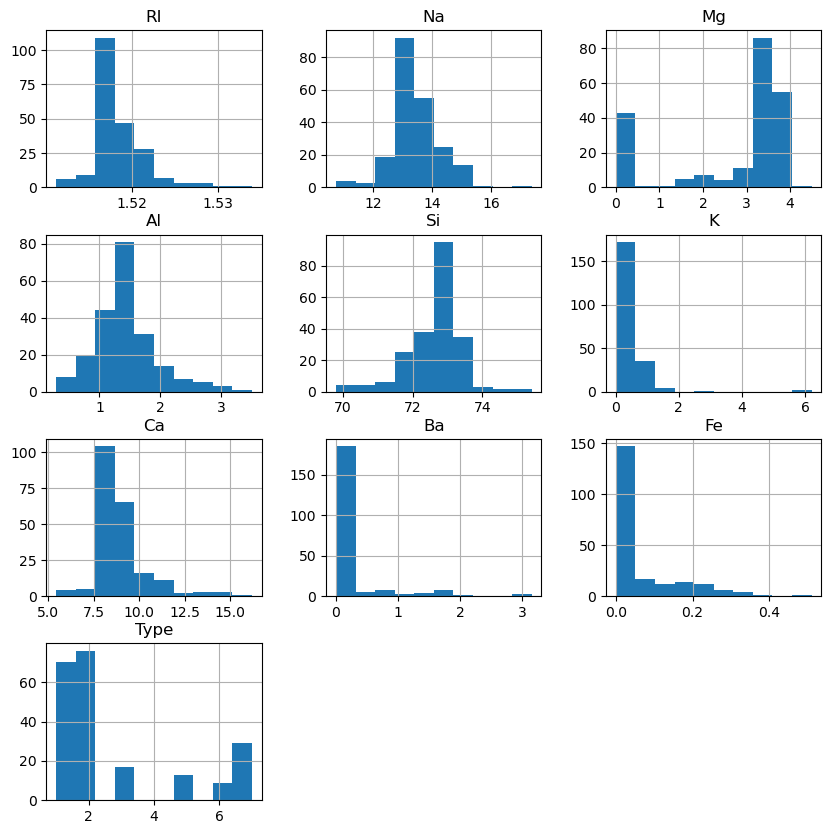

In [4]:
# understanding the correlation between the data
df.hist(figsize=(10,10));

In [41]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Cleaning The Dataset

- Detection of Outliers
- Elimination of Outliers

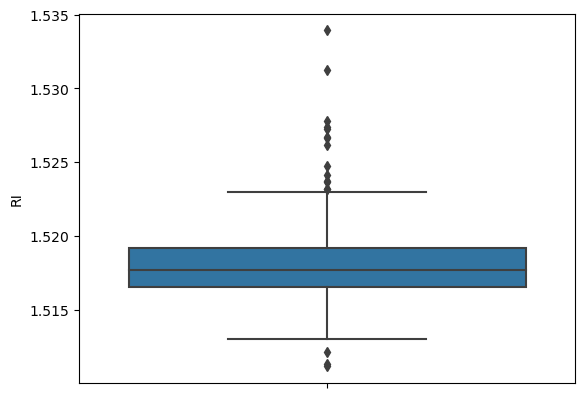

In [11]:
# Detection of Outliers
sns.boxplot(y=df["RI"]);

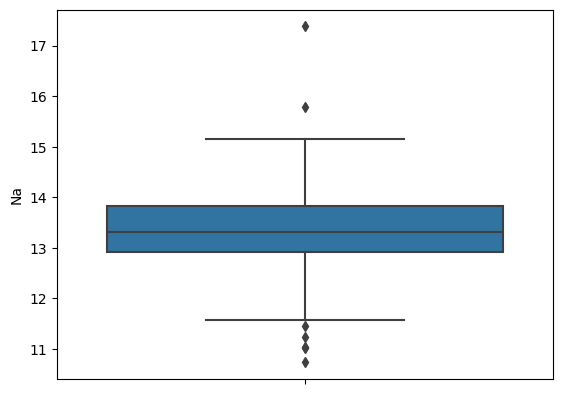

In [12]:
sns.boxplot(y=df["Na"]);

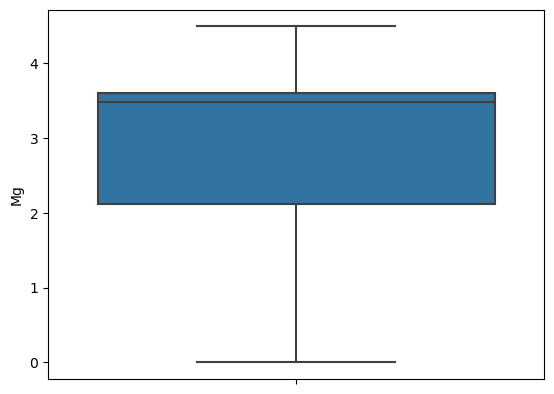

In [42]:
sns.boxplot(y=df["Mg"]);

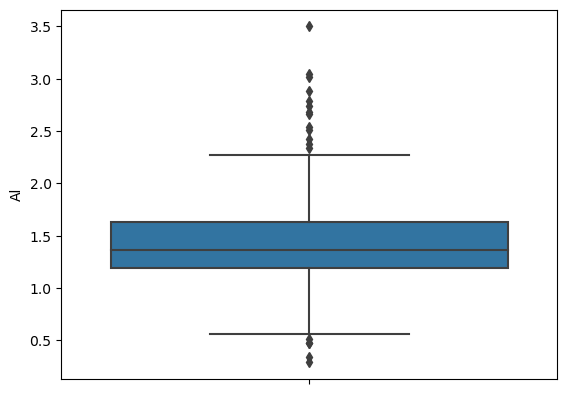

In [43]:
sns.boxplot(y=df["Al"]);

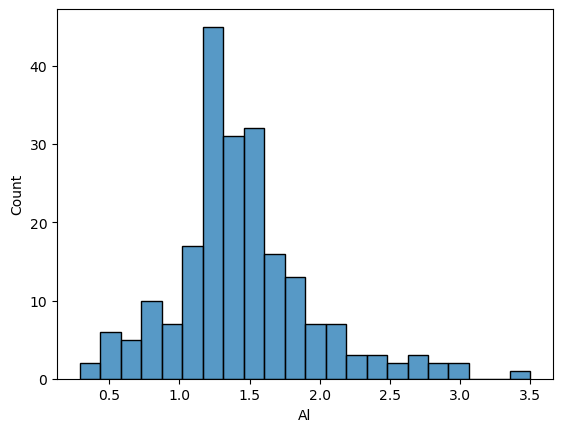

In [46]:
sns.histplot(x=df["Al"]);

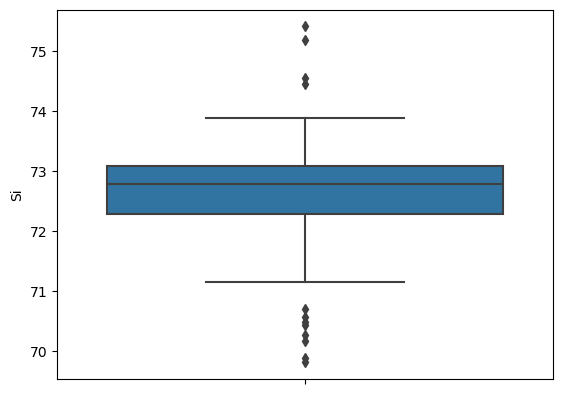

In [49]:
sns.boxplot(y=df["Si"]);

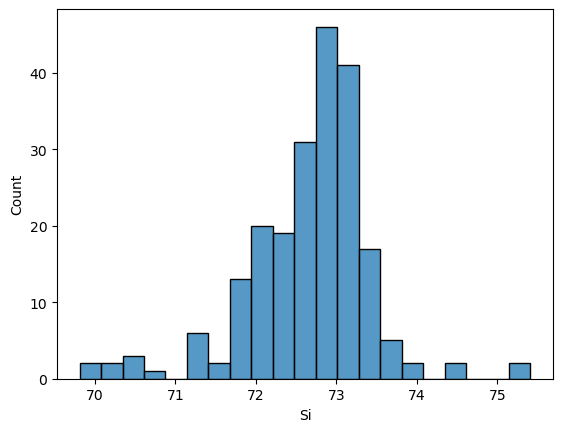

In [52]:
sns.histplot(x=df["Si"]);

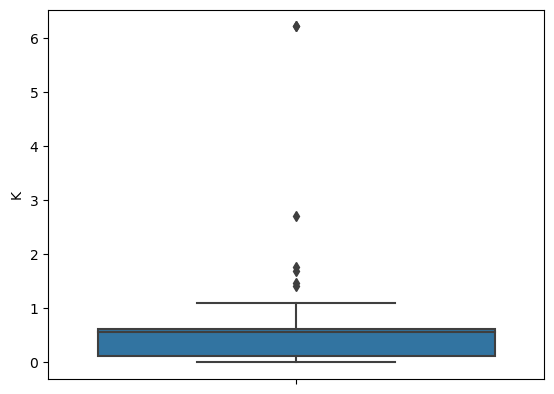

In [55]:
sns.boxplot(y=df["K"]);

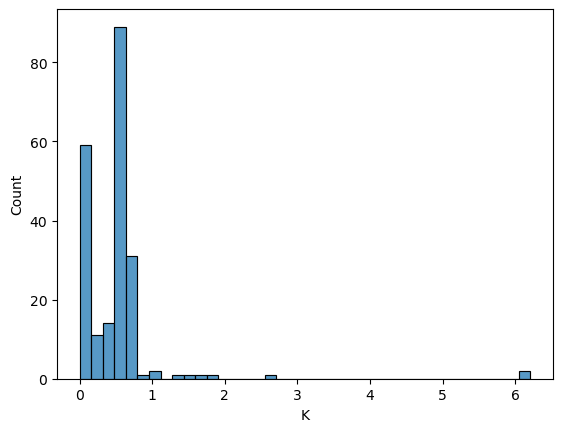

In [57]:
sns.histplot(x=df["K"]);

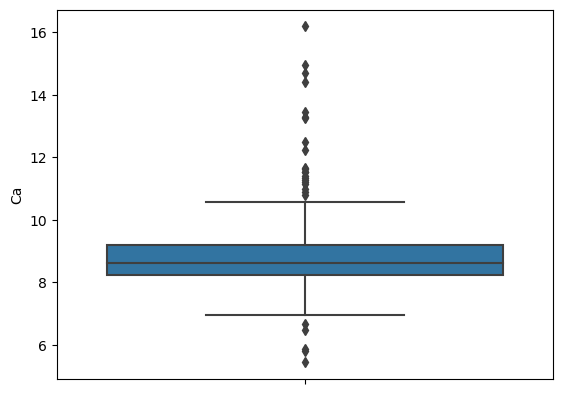

In [59]:
sns.boxplot(y=df["Ca"]);

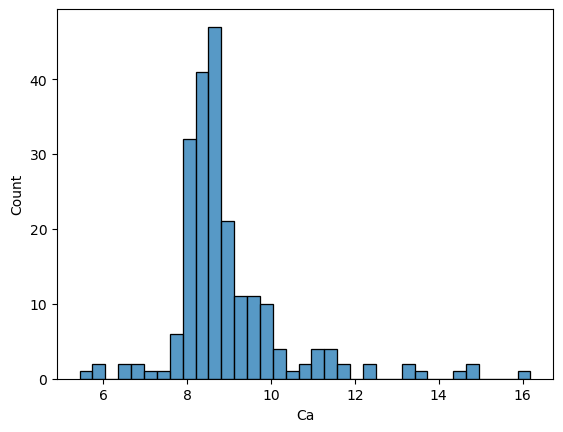

In [61]:
sns.histplot(x=df["Ca"]);

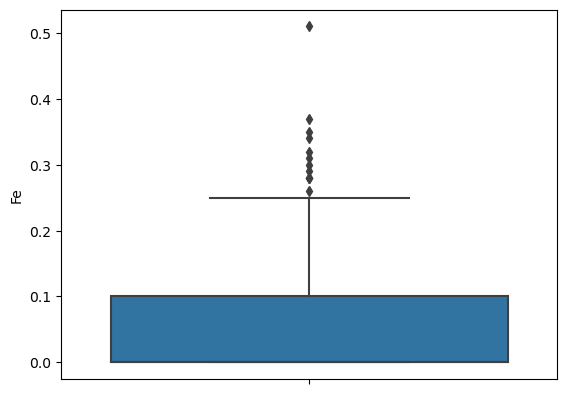

In [65]:
sns.boxplot(y=df["Fe"]);

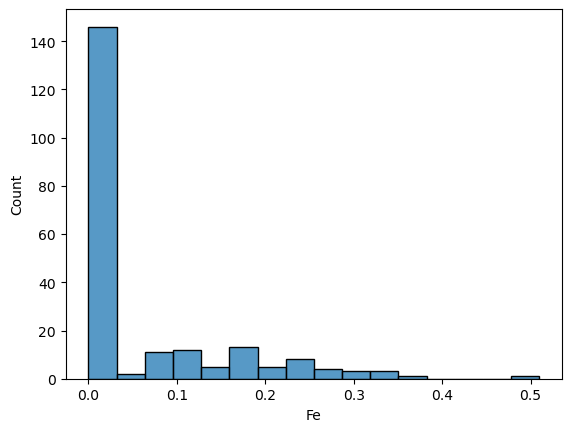

In [66]:
sns.histplot(x=df["Fe"]);

In [84]:
df_cleaned = df[(df["Na"]>11.0) & (df["Na"]<15) & (df["RI"]<1.520) & (df["Al"]<=3.0) & (df["Si"]>71) & (df["Si"]<=74) & (df["K"]<2) & (df["Ca"]<13) & (df["Fe"]<0.35)]

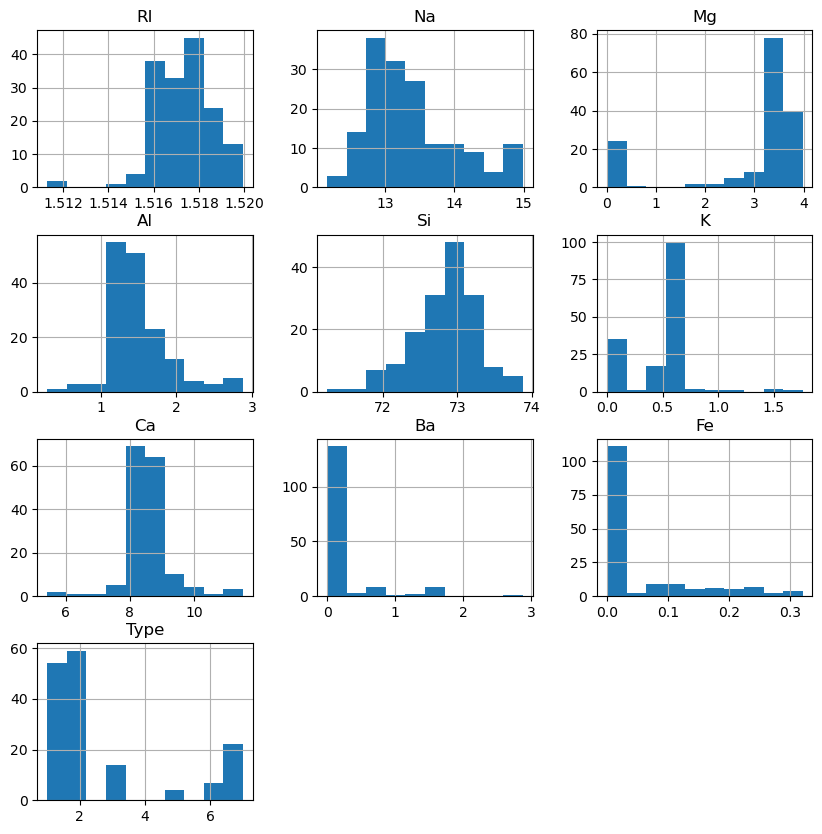

In [85]:
# cleaned Dataset Visualization
df_cleaned.hist(figsize=(10,10));

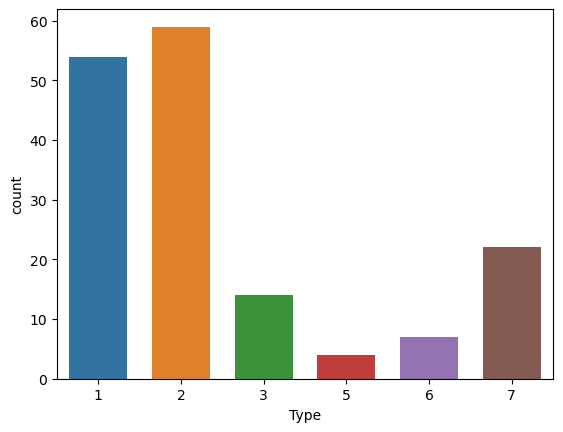

In [86]:
# analyzing the number and types of outputs
sns.countplot(x=df_cleaned["Type"], width=0.7);

In [87]:
# finding the total number of possible outcomes
df_cleaned.Type.unique(), len(df_cleaned.Type.unique())

(array([1, 2, 3, 5, 6, 7]), 6)

**Inference**

As the data outcomes are discrete, we would use a multiclass classification algorithm such as non-binary multiclass classification.

For this data, I will use **Random Forest Classifier** Algorithm.

### Model Creation and Training

In [96]:
# splitting the data into labels and outcomes
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape , y.shape

((214, 9), (214,))

In [97]:
# splitting the data into train and test set with test size of 0.15 as the availability of data is less
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [98]:
# importing necessary libraries for model creation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [99]:
# creating the pipeline for the model and getting the pipeline paramerters
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("randomForest", RandomForestClassifier())
])
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('randomForest', RandomForestClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'randomForest': RandomForestClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'randomForest__bootstrap': True,
 'randomForest__ccp_alpha': 0.0,
 'randomForest__class_weight': None,
 'randomForest__criterion': 'gini',
 'randomForest__max_depth': None,
 'randomForest__max_features': 'sqrt',
 'randomForest__max_leaf_nodes': None,
 'randomForest__max_samples': None,
 'randomForest__min_impurity_decrease': 0.0,
 'randomForest__min_samples_leaf': 1,
 'randomForest__min_samples_split': 2,
 'randomForest__min_weight_fraction_leaf': 0.0,
 'randomForest__n_estimators': 100,
 'randomForest__n_jobs': None,
 'randomForest__oob_score': False,
 'randomForest__random_state': None,
 'randomForest__verbose': 0,
 'randomForest__warm_start': False}

In [100]:
# creating a cross validation estimator grid with estimators and maximum depth as grid parameters

estimator = GridSearchCV(estimator=pipe, param_grid={
    'randomForest__n_estimators':[i for i in range(50,151,5)],
    'randomForest__max_depth':[i for i in range(1,11)]
}, scoring='accuracy', cv=None)

In [101]:
# fitting the estimator
estimator.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('randomForest',
                                        RandomForestClassifier())]),
             param_grid={'randomForest__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10],
                         'randomForest__n_estimators': [50, 55, 60, 65, 70, 75,
                                                        80, 85, 90, 95, 100,
                                                        105, 110, 115, 120, 125,
                                                        130, 135, 140, 145,
                                                        150]},
             scoring='accuracy')

In [102]:
# storing the results of the estimator in a dataframe
result_df = pd.DataFrame(estimator.cv_results_)

In [103]:
# getting the parameters for the best optimum model
print(estimator.best_index_)
print(estimator.best_params_)
print(estimator.best_score_)

208
{'randomForest__max_depth': 10, 'randomForest__n_estimators': 145}
0.7792792792792793


In [104]:
# getting the details about best optimum model from result database
result_df.iloc[estimator.best_index_]

mean_fit_time                                                                0.183797
std_fit_time                                                                 0.015323
mean_score_time                                                              0.013309
std_score_time                                                               0.000907
param_randomForest__max_depth                                                      10
param_randomForest__n_estimators                                                  145
params                              {'randomForest__max_depth': 10, 'randomForest_...
split0_test_score                                                             0.72973
split1_test_score                                                                0.75
split2_test_score                                                            0.833333
split3_test_score                                                            0.833333
split4_test_score                                     

In [105]:
# creating an improvised estimator with parameters close to best estimate of previous estimator
est_depth = estimator.best_params_['randomForest__max_depth']
est_estimators = estimator.best_params_['randomForest__n_estimators']
delta1 = 5
delta2 = 3
estimator_improvised = GridSearchCV(estimator=pipe, param_grid={
    'randomForest__n_estimators':[i for i in range(est_estimators-delta1,est_estimators+delta1+1)],
    'randomForest__max_depth':[i for i in range(est_depth-delta2,est_depth+delta2+1)],
}, scoring='accuracy', cv=None)

In [106]:
# fitting the improvised estimator
estimator_improvised.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('randomForest',
                                        RandomForestClassifier())]),
             param_grid={'randomForest__max_depth': [7, 8, 9, 10, 11, 12, 13],
                         'randomForest__n_estimators': [140, 141, 142, 143, 144,
                                                        145, 146, 147, 148, 149,
                                                        150]},
             scoring='accuracy')

In [107]:
# storing the results of improvised estimator in a dataframe
result2_df = pd.DataFrame(estimator.cv_results_)

In [108]:
# getting the parameters for the best optimum model from the improvised estimator
print(estimator_improvised.best_index_)
print(estimator_improvised.best_params_)
print(estimator_improvised.best_score_)

23
{'randomForest__max_depth': 9, 'randomForest__n_estimators': 141}
0.7792792792792793


In [109]:
# getting the details about best optimum model from improvised result database
result2_df.iloc[estimator_improvised.best_index_]

mean_fit_time                                                                0.097489
std_fit_time                                                                 0.013978
mean_score_time                                                              0.008147
std_score_time                                                               0.002183
param_randomForest__max_depth                                                       2
param_randomForest__n_estimators                                                   60
params                              {'randomForest__max_depth': 2, 'randomForest__...
split0_test_score                                                            0.621622
split1_test_score                                                            0.583333
split2_test_score                                                            0.611111
split3_test_score                                                                0.75
split4_test_score                                     

In [110]:
# getting the top 2 estimators
model1 = estimator.best_estimator_
model2 = estimator_improvised.best_estimator_

### Model Evaluation

In [111]:
# comparing the top two models

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

preds1 = model1.predict(X_test)
preds_train1 = model1.predict(X_train)
accuracy_test1 = accuracy_score(y_true=y_test, y_pred=preds1)
accuracy_train1 = accuracy_score(y_true=y_train, y_pred=preds_train1) 
cmatrix1 = confusion_matrix(y_true=y_test, y_pred=preds1)
print(f'Model 1 Metrics')
print(f'accuracy (test)       : {accuracy_test1}\n\tin precentage :\t{accuracy_test1*100} %\n')
print(f'accuracy (train)      : {accuracy_train1}\n\tin precentage :\t{accuracy_train1*100} %\n')
print(f'confusion matrix (for 6 outcomes):\n{cmatrix1}')

preds2 = model2.predict(X_test)
preds_train2 = model2.predict(X_train)
accuracy_test2 = accuracy_score(y_true=y_test, y_pred=preds2)
accuracy_train2 = accuracy_score(y_true=y_train, y_pred=preds_train2) 
cmatrix2 = confusion_matrix(y_true=y_test, y_pred=preds2)
print(f'\nModel 2 Metrics')
print(f'accuracy (test)       : {accuracy_test2}\n\tin precentage :\t{accuracy_test2*100} %\n')
print(f'accuracy (train)      : {accuracy_train2}\n\tin precentage :\t{accuracy_train2*100} %\n')
print(f'confusion matrix (for 6 outcomes):\n{cmatrix2}')

Model 1 Metrics
accuracy (test)       : 0.8787878787878788
	in precentage :	87.87878787878788 %

accuracy (train)      : 1.0
	in precentage :	100.0 %

confusion matrix (for 6 outcomes):
[[8 1 0 0 0 0]
 [1 9 0 0 0 0]
 [0 0 2 0 0 0]
 [0 2 0 1 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 6]]

Model 2 Metrics
accuracy (test)       : 0.8787878787878788
	in precentage :	87.87878787878788 %

accuracy (train)      : 0.994475138121547
	in precentage :	99.4475138121547 %

confusion matrix (for 6 outcomes):
[[8 1 0 0 0 0]
 [2 8 0 0 0 0]
 [0 0 2 0 0 0]
 [0 1 0 2 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 6]]


In [112]:
print(f'Test delta  : {(accuracy_test1-accuracy_test2)*100}%')
print(f'Train delta : {(accuracy_train1-accuracy_train2)*100}%')

Test delta  : 0.0%
Train delta : 0.5524861878453025%


We can see the metrics as:

- Model1

    - Test Accuracy     : 90.69%

    - Train Accuracy    : 97.66%

- Model2

    - Test Accuracy     : 81.39%

    - Train Accuracy    : 97.66%

We can see that *model1* perfoms better on train set than test set by a margin of **9.30%** and  *model1* perfoms better on test set than train set by a margin of **0.00%**.

Hence, from this observation, we can say that model1 outperfoms model2.

Therefore model1 is the most optimum model.

### Exporting the Model

In [71]:
# exporting the model in .joblib format
from joblib import dump
dump(model1, "glass_pred.joblib")

['glass_pred.joblib']

In [113]:
# loading the model and finding its accuracy

from joblib import load
from sklearn.metrics import accuracy_score

load_model = load("./glass_pred_90_accuracy.joblib")

pred_load = load_model.predict(X_test)
accuracy_load_model = accuracy_score(y_true=y_test,y_pred=pred_load)
print(f'Accuracy of the model loaded : {accuracy_load_model*100} %')

Accuracy of the model loaded : 93.93939393939394 %


### Conclusion

Hence, a **Random Forest Classifier** algorithm is implemented on the given data and a Machine Learning model with **93.698% accuracy** is obtained.